In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pl-tables-1993-2024.csv")
df.head()

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Norwich City,3,42,21,9,12,61,65,-4,72,→ UEFA Cup via league finish 1
3,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
4,1993,QPR,5,42,17,12,13,63,55,8,63,NaN


In [3]:
df.columns

Index(['season_end_year', 'team', 'position', 'played', 'won', 'drawn', 'lost',
       'gf', 'ga', 'gd', 'points', 'notes'],
      dtype='object')

In [4]:
df.describe

<bound method NDFrame.describe of      season_end_year               team  position  played  won  drawn  lost  \
0               1993     Manchester Utd         1      42   24     12     6   
1               1993        Aston Villa         2      42   21     11    10   
2               1993       Norwich City         3      42   21      9    12   
3               1993          Blackburn         4      42   20     11    11   
4               1993                QPR         5      42   17     12    13   
..               ...                ...       ...     ...  ...    ...   ...   
641             2024          Brentford        16      38   10      9    19   
642             2024  Nottingham Forest        17      38    9      9    20   
643             2024         Luton Town        18      38    6      8    24   
644             2024            Burnley        19      38    5      9    24   
645             2024      Sheffield Utd        20      38    3      7    28   

     gf   ga  gd 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season_end_year  646 non-null    int64 
 1   team             646 non-null    object
 2   position         646 non-null    int64 
 3   played           646 non-null    int64 
 4   won              646 non-null    int64 
 5   drawn            646 non-null    int64 
 6   lost             646 non-null    int64 
 7   gf               646 non-null    int64 
 8   ga               646 non-null    int64 
 9   gd               646 non-null    int64 
 10  points           646 non-null    int64 
 11  notes            326 non-null    object
dtypes: int64(10), object(2)
memory usage: 60.7+ KB


In [6]:
df.isnull().sum()

season_end_year      0
team                 0
position             0
played               0
won                  0
drawn                0
lost                 0
gf                   0
ga                   0
gd                   0
points               0
notes              320
dtype: int64

In [7]:
df.drop('notes', axis=1, inplace=True)

In [8]:
df['league_winner'] = df['position'].apply(lambda x: 1 if x == 1 else 0)

In [9]:
df.columns

Index(['season_end_year', 'team', 'position', 'played', 'won', 'drawn', 'lost',
       'gf', 'ga', 'gd', 'points', 'league_winner'],
      dtype='object')

<Axes: xlabel='league_winner', ylabel='points'>

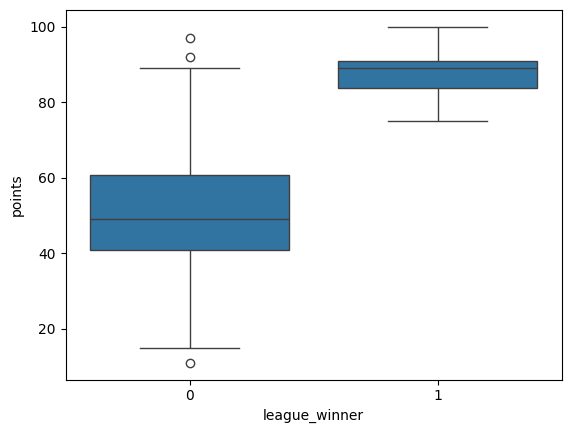

In [11]:
sns.boxplot(x='league_winner', y='points', data=df)

<Axes: xlabel='league_winner', ylabel='gd'>

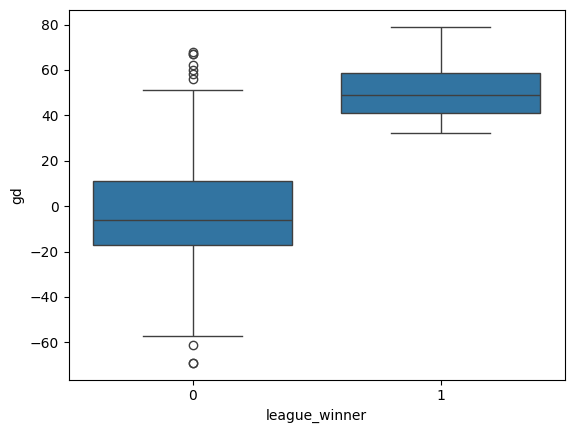

In [12]:
sns.boxplot(x='league_winner', y='gd', data=df)

<Axes: >

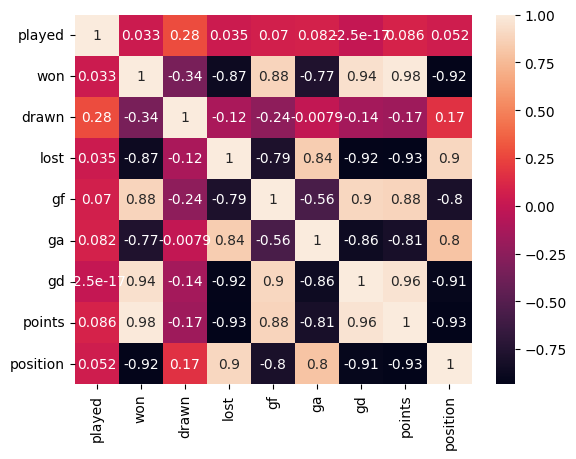

In [13]:
corr = df[['played', 'won', 'drawn', 'lost', 'gf', 'ga', 'gd', 'points', 'position']].corr()
sns.heatmap(corr, annot=True)

In [14]:
df.groupby('team')['league_winner'].sum().sort_values(ascending=False)

team
Manchester Utd       13
Manchester City       8
Chelsea               5
Arsenal               3
Liverpool             1
Leicester City        1
Blackburn             1
Barnsley              0
Aston Villa           0
Blackpool             0
Birmingham City       0
Brighton              0
Burnley               0
Cardiff City          0
Charlton Ath          0
Bournemouth           0
Bradford City         0
Brentford             0
Bolton                0
Everton               0
Derby County          0
Crystal Palace        0
Coventry City         0
Ipswich Town          0
Hull City             0
Fulham                0
Huddersfield          0
Luton Town            0
Leeds United          0
Middlesbrough         0
Newcastle Utd         0
Norwich City          0
Nottingham Forest     0
Oldham Athletic       0
Portsmouth            0
QPR                   0
Reading               0
Sheffield Utd         0
Sheffield Weds        0
Southampton           0
Stoke City            0
Sunderland 